# HW 4: Heuristically Optimized Trade-offs (HOT) Based Models

## Task 1:
### In this task you are supposed to generate a network based on a simple optimization criteria: Each newly added node ($i$) which has a uniformly random position $(x,y)$ on the unit square, takes into account its distance ($d_{ij}$) to other nodes ($j<i$) as well as the hop count ($h_j$) from that node to a central node in the network to decide which node to connect. The node to connect to is chosen as follows:
### $$node = argmin_{j<i} \   \alpha d_{ij} + h_j $$
### Here $ \alpha $ is a parameter gauging the relative importance of the two objectives.
### You are supposed to:
### -- Generate a network with $n=500$ nodes based on the above optimization model with $\alpha = 5$. Here, choose the first node as the central node.
### -- Visualize the network using NetworkX built-in visulization method which can take into account the position of each node on the plane as well (nx.draw()). Make sure to highlight the central node with a different color using nx.draw_networkx_nodes().
### -- Plot the degree distribution and decide whether it is close to a Binomial, Exponential, or Power law distribution.
### -- Repeat the task for $\alpha = 1,10,100 $ and compare the results.

In [4]:
# Importing Libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import warnings
import math, random, sys
warnings.filterwarnings('ignore')

In [74]:
## The function for deriving and plotting the degree distribution and its normalized version on arithmetic and loglog scale

def plot_deg_dist(G,parameter):
    degs = {}
    for n in G.nodes():
        deg = G.degree(n) 
        if deg not in degs:
            degs[deg] = 0 
        degs[deg] += 1

    items = sorted(degs.items())
    fig = plt.figure()
    ax = fig.add_subplot(211)
    ax.plot([k for (k,v) in items], [v for (k,v) in items]) 
    ax.set_xscale('log') 
    ax.set_yscale('log')
    plt.title("Log-Log Degree Distribution")
    
    ab = fig.add_subplot(212)
    ab.plot([k for (k,v) in items], [v for (k,v) in items]) 
    #ab.set_xscale('log') 
    #ab.set_yscale('log')
    plt.title("Degree Distribution")
    fig.tight_layout()
    #fig.savefig("degree_distribution.png")
    plt.show()
# Your code here


In [24]:
## The function that generates and outputs a HOT graph with n nodes and parameter alpha

def make_HOT_graph(n,alpha):
    G=nx.empty_graph(n)          #create graph w/ no edges
    pos=nx.random_layout(G)      #generate pos of nodes w/ uniform random position 
    for n in G:                  #assign pos to each node
        G.node[n]['pos']=pos[n]  
    G.node[0]['pos']=[0.0,0.0]   #overwrite first node to make center

    for u in G:                  #loop thru each node and assign edges based on optimization criteria
        src=G.node[u]['pos']
        dist={}
        for v in G:
            if (u!=v):
                dest=G.node[v]['pos']
                try:
                    dist[v]= alpha * math.sqrt( sum(((src-dest)**2) )) + nx.shortest_path_length(G,u,v) # w/hopcount
                except nx.NetworkXNoPath:
                    dist[v]= alpha * math.sqrt( sum(((src-dest)**2) )) + 0                              # wo/hopcount
        vnode= min(dist, key=lambda k: dist[k]) #get node number of smallest alpha * eucliden_dist + hopcount
        G.add_edge(u,vnode)                     #then create an edge between the two nodes

    return G
    

In [38]:
def draw_center(G):
    center=[]
    center.append(0)
    center_pos={}
    center_pos[0]=g1.node[0]['pos']
    nx.draw_networkx_nodes(G, pos=center_pos,nodelist=center, node_size=50, node_color='b', node_shape='o')
    

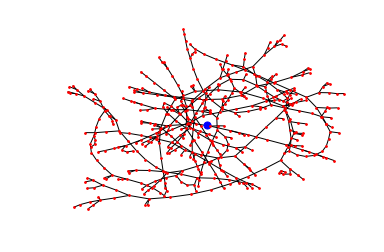

In [57]:
g5=make_HOT_graph(500,5)
draw_center(g5)
nx.draw(g5, node_size=3)
plt.show() 

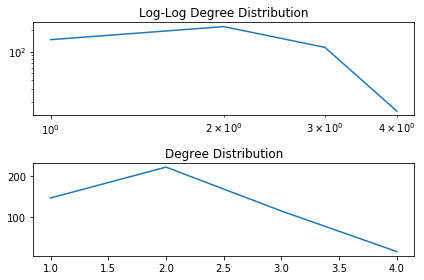

In [75]:
plot_deg_dist(g5,5)

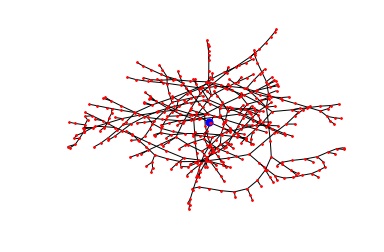

In [40]:
# Generate networks with all the given parameters and respond to all of the tasks in the problem statements.

    # Your code here

g1=make_HOT_graph(500,1)
draw_center(g1)
nx.draw(g1, node_size=3)
plt.show() 

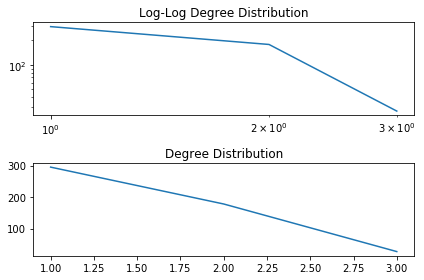

In [76]:
plot_deg_dist(g1,1)

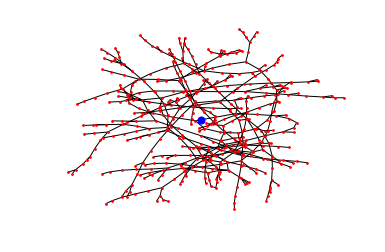

In [53]:
g2=make_HOT_graph(500,10)
draw_center(g2)
nx.draw(g2, node_size=3)
plt.show() 

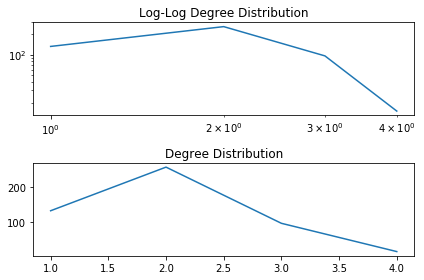

In [77]:
plot_deg_dist(g2,10)

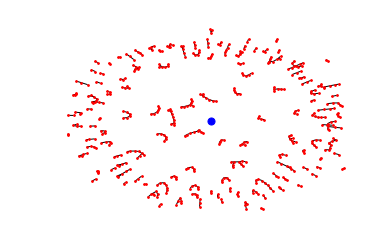

In [55]:
g3=make_HOT_graph(500,100)
draw_center(g3)
nx.draw(g3, node_size=3)
plt.show() 

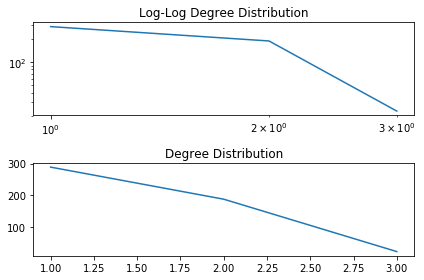

In [78]:
plot_deg_dist(g3,100)

<h3> <span style="color:red">The degree distributions seem to follow a power law degree distribution.</span>

## Task 2:
### In this task you are given a core network inspired by an actual infrastructure and you are supposed to connect random nodes to the nodes of this core network according to a power law. Then you are supposed to calculate a performance measure for this network. 
### Then, you are supposed to create a preferential attachment random graph based on the Barabasi-Albert model with the same number of nodes and compare the perfomance measure of this network to the first network. 
### Create the following graph in NetworkX.

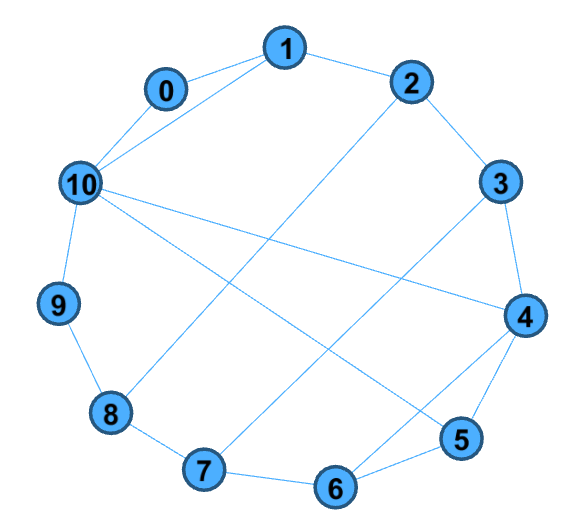

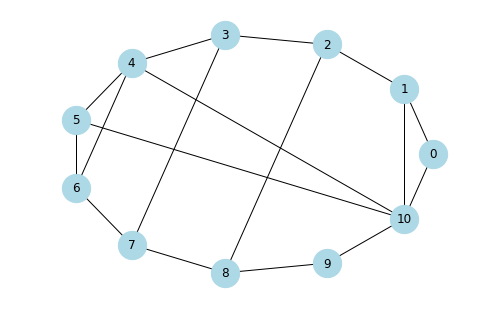

In [5]:
    
# Your code here
G=nx.empty_graph(11)
es=[]
es=[(0,1),(0,10),(2,1),(1,10),(2,8),(2,3),(3,4),(3,7),(4,10),(4,5),(4,6),(5,10),(5,6),(6,7),(7,8),(8,9),(9,10)]
G.add_edges_from(es)
nx.draw_circular(G,with_labels=True,node_color='lightblue',node_size=800)
plt.show()

### To each node of the above core network connect random number of new nodes according to a power law distribution with mean 10 and $\alpha = 3$.

In [154]:
import powerlaw
# Your code here
vals=powerlaw.Power_Law(xmin=3, parameters=[3], discrete=True)
simulated_data = vals.generate_random(11)
print "values: " + str(simulated_data)
print "mean: " + str(np.mean(simulated_data))
print "alpha: " + str(vals.alpha)
    

values: [  5.  11.  63.   3.   4.   4.   4.   6.   3.   7.   5.]
mean: 10.4545454545
alpha: 3


In [6]:
G2=G
new_nodes=[5,11,63,3,4,4,4,6,3,7,5]
#print G2.order()
#new_nodes=simulated_data.astype(int)
original_size=G2.order()
for n in range(original_size):
    for i in range(new_nodes[n]):
        new_node=G2.order()
        G2.add_node(new_node)
        #print "new node# " +str(G2.order()+1)
        G2.add_edge(n,new_node) 
print nx.info(G2)

Name: 
Type: Graph
Number of nodes: 126
Number of edges: 132
Average degree:   2.0952


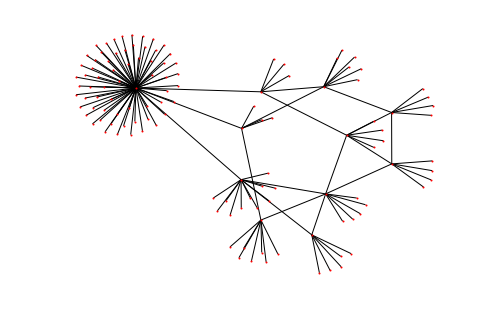

In [5]:
#nx.draw_circular(G2,with_labels=True,node_color='lightblue',node_size=800)
nx.draw_spring(G2,node_size=1)
plt.show()   

### Visualize the resulted graph using gephi and include the visualization in your notebook.

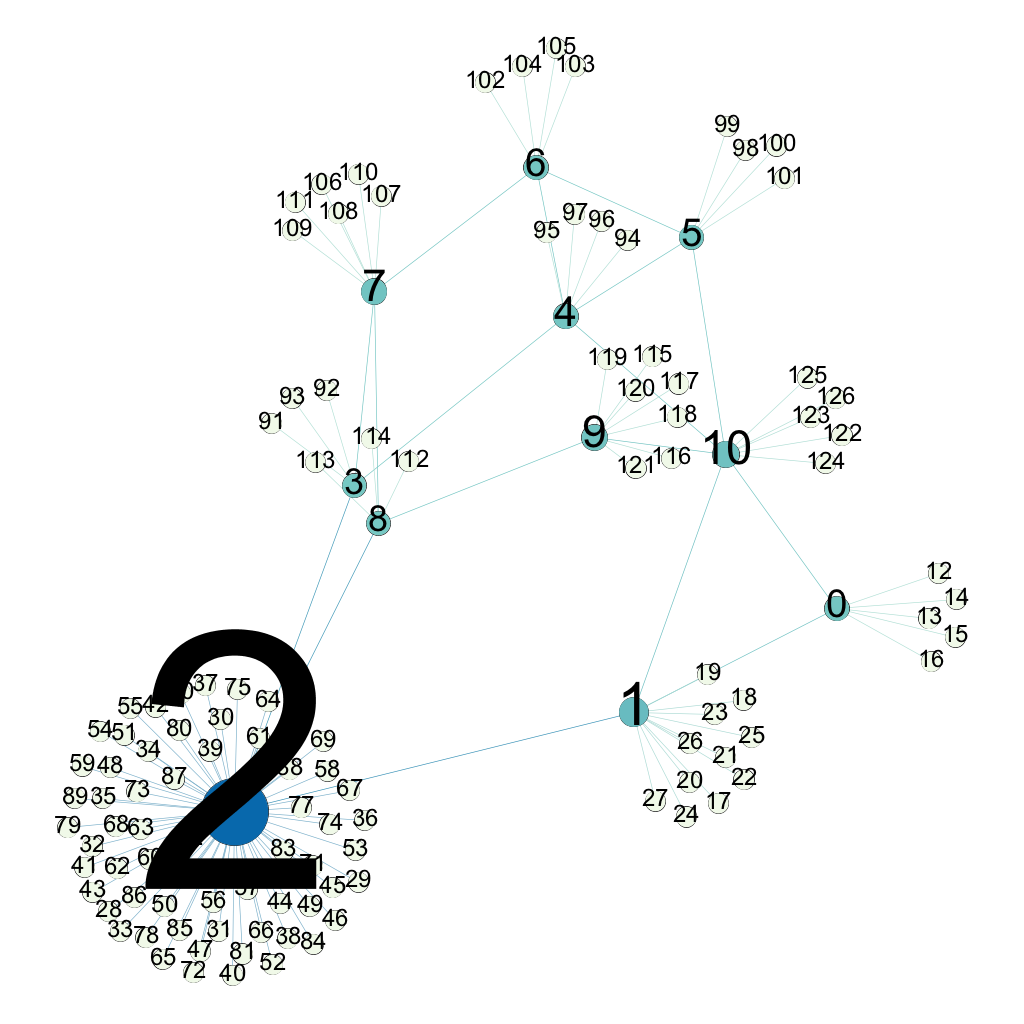

In [224]:
# Your code here
nx.write_gml(G2,"corenet.gml")
from IPython.display import Image
from IPython.display import display
corenet=Image(filename='corenet.png')

display(corenet)

### For each pair of the newly added nodes perform shortest path routing using NetworkX and create a binary matrix $R$ such that each row of the matrix correspond to a core node and each column correspond to an ordered pair of newly added nodes. Each element of this matrix is "one" if the shortest path between the corresponding pair goes through the corresponding core node and "zero" otherwise. This matrix is sometimes called the routing matrix.


In [7]:
# Your code here
new_nodes=range(original_size,G2.order())
pairs = zip(new_nodes[::2], new_nodes[1::2]) 
r, c = 11, len(pairs) ;
R = [[0 for x in range(c)] for y in range(r)]

def route_scan( sequence, lower, upper ):
    for index, value in enumerate( sequence ):
        if lower < value < upper: return value

for row in range(original_size):
    itr=0
    for u, v in pairs:
        curr_route=nx.shortest_path(G2,source=u,target=v)
        check=route_scan(curr_route,row-1,row+1)
        if (check!=None):
            R[check][itr]=1
        else: R[row][itr]=0
        itr+=1
    
for row in R:
    print " ".join(map(str,row))

1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

### Find the solution of the following linear programming using $cvxpy$ library:
### $$ Maximize \sum X_{i,j} $$
### $$ s.t. \ \ X_{i,j} \ge 0 , RX\le B  $$

### Here, $B$ is a vector containing the maximum bandwidth of each of the core nodes. In this homework assume that all the elements of this vector are set to 10.

In [11]:
# !pip install cvxpy
from cvxpy import *

m = 11
n = (G2.order()-11)*(G2.order()-12)
B = np.ones(m)*10
x = Variable(n)
objective = Maximize(sum(x))

constraints = [ x>=0, sum_entries(mul_elemwise(n,x)) <= B ]

p = Problem(objective, constraints)

print 'Computing... '
result = p.solve()
print x.value
print 'Done!'

Computing... 
[[  5.81827999e-08]
 [  5.81827999e-08]
 [  5.81827999e-08]
 ..., 
 [  5.81827999e-08]
 [  5.81827999e-08]
 [  5.81827999e-08]]
Done!


In [ ]:
# Your code here
    

### Now create a Barabasi-Albert random graph with the same number of nodes as the previous graph and $m=1$ and visualize it using Gephi.

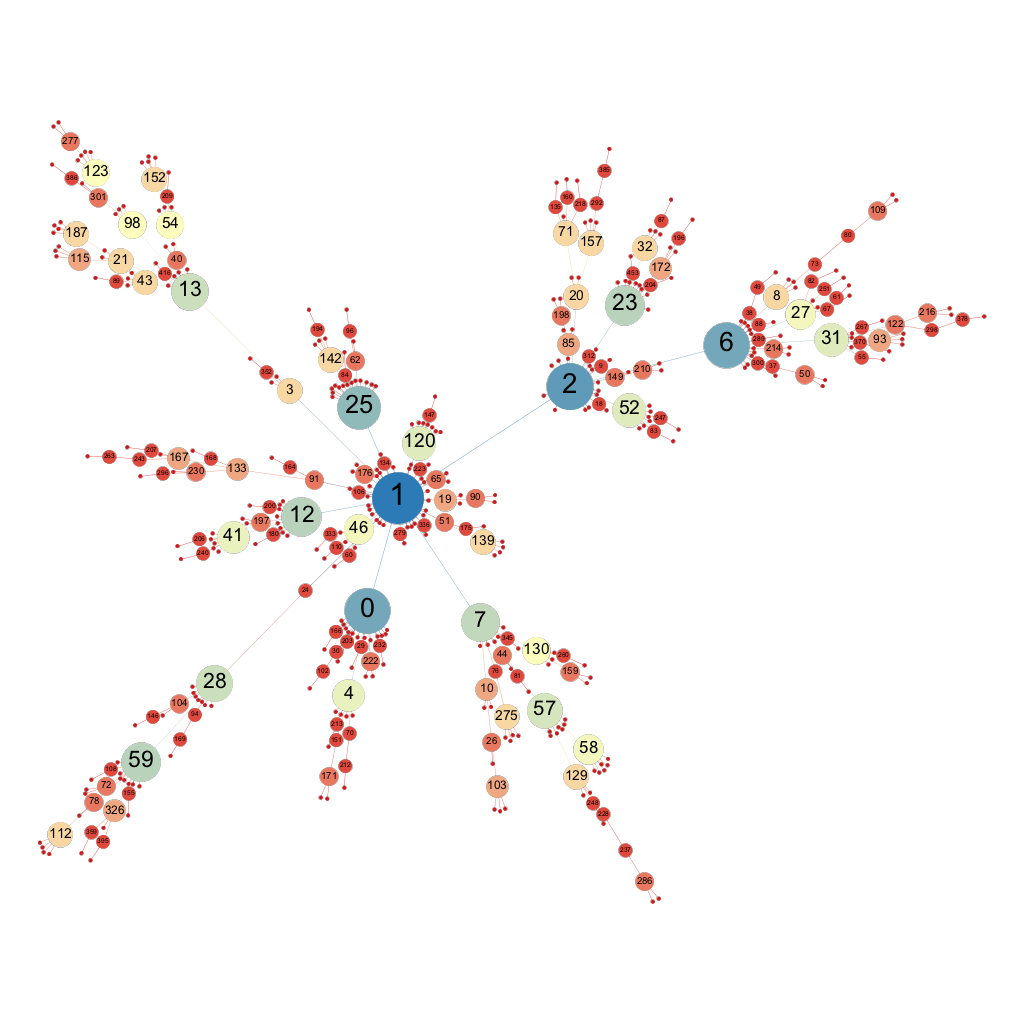

In [12]:
# Your code here
G3=nx.barabasi_albert_graph(500,1)
nx.write_gml(G3,"barabasi.gml")
from IPython.display import Image
from IPython.display import display
barabasi=Image(filename='barabasi.png')

display(barabasi)

### Calculate the routing matrix for this random graph with the first 11 nodes as the core. (Ignore the pairs whose shortest path does not go through the core.)

In [14]:
# Your code here
original_size=11
new_nodes3=range(original_size,G3.order())
pairs3 = zip(new_nodes3[::2], new_nodes3[1::2]) 
r, c = 11, len(pairs3) ;
R3 = [[0 for x in range(c)] for y in range(r)]

for row in range(original_size):
    itr=0
    for u, v in pairs3:
        curr_route=nx.shortest_path(G3,source=u,target=v)
        check=route_scan(curr_route,row-1,row+1)
        if (check!=None):
            R3[check][itr]=1
        else: R3[row][itr]=0
        itr+=1
    
for row in R3:
    print " ".join(map(str,row))

0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1
1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
0 0 0 0 0 1 0 0 0 1 0 0 

### Now solve the previous optimization problem for this random graph and compare the result with the previous result. Which network has a higher performance?

In [ ]:
# Your code here
from cvxpy import *

m = 11
n = (G3.order()-11)*(G3.order()-12)
B = np.ones(m)*10
x = Variable(n)
objective = Maximize(sum(x))

constraints = [ x>=0, sum_entries(mul_elemwise(n,x)) <= B ]

p = Problem(objective, constraints)

print 'Computing... '
result = p.solve()
print x.value
print 'Done!'